# `scipy.stats` and 3D plots

## Part 1: Introduction and set up of the model

In this programming assignment, you will work in creating plots in 3D and the projections of those plots in 2D using contours. These plotting tools are useful, for instance, when displaying the results of bivariate distribution.

Imagine you are a scientist interested in the atmospheric processes that lead to precipitation. You have been studying the relationship between the rain rate ($RR$, mm/h) and the ice content in the clouds ($IC$, kg/m2). You have determined that the bivariate distribution $F(RR, IC)$ is well described using a bivariate Gaussian distribution with the following parameters: $\mu_{RR} = 10$ mm/h and $\sigma_{RR}=2$ mm/h, $\mu_{IC} = 700$ kg/m2 and $\sigma_{IC}=300$ kg/m2, and $Cov(RR, IC)=300 \ mm/h \times kg/m2$.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 3.1:}$
    
Define a bivariate Gaussian distribution between $RR$ and $IC$ given the above information. Draw 100 random samples from the defined distribution and plot them.

Follow the following steps:
- Define the vector of means
- Define the covariance matrix
- Define the bivariate Gaussian distribution with <code>scipy.stats.multivariate_normal</code> and draw 100 samples using the <code>rvs</code> method
</p>
</div>

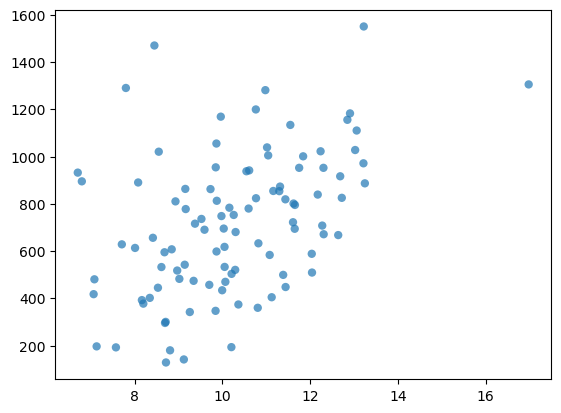

In [2]:
# Define the vector of means
mu1 = 10
mu2 = 700
mu = [mu1, mu2] #vector of means

# Define the covariance matrix
s1 = 2**2
s2 = 300**2
covariance = 300
sigma =[[s1, covariance],
        [covariance, s2]]

# Draw 100 samples from a bivariate Gaussian distribution
samples = multivariate_normal(mean=mu, cov=sigma).rvs(size=100)

# Scatter plot against observations
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.7, edgecolors="none")

## Part 2. 3D plots

In order to create 3D plots, we usually need to evaluate a function over a 2D grid. To do so, we can use the function `np.meshgrid` which takes two 1D arrays of values (usually representing axes x and y) and turns them into 2D grids, so you can evaluate functions over a grid of (x, y) points.

Let's see it with an example!

Imagine that I want to calculate $Z$ as function of $A$ and $B$, $Z = A^2+B$, with uniformly distributed values of $A$ and $B$ and plot it spatially. Thus, $A$ and $B$ are the axis x and y, while $Z$ is the z-axis. We need to generate a grid with values of $A$ and $B$ to evaluate $Z$. We can do it as follows:

In [3]:
# Define the range of values for A and B
n = 5 #number of values or size of the mesh
values_A = np.linspace(0,30,n)
values_B = np.linspace(-5, 5,n)

# Define the grid
A2,B2 = np.meshgrid(values_A,values_B)

print(f"The values to evaluate A are: {values_A}")
print(f"The values to evaluate B are: {values_B}\n")
print(f"The grid defined for A is: {A2}")
print(f"The shape of A2 is: {A2.shape}\n")
print(f"The grid defined for B is: {B2}")
print(f"The shape of B2 is: {B2.shape}")

The values to evaluate A are: [ 0.   7.5 15.  22.5 30. ]
The values to evaluate B are: [-5.  -2.5  0.   2.5  5. ]

The grid defined for A is: [[ 0.   7.5 15.  22.5 30. ]
 [ 0.   7.5 15.  22.5 30. ]
 [ 0.   7.5 15.  22.5 30. ]
 [ 0.   7.5 15.  22.5 30. ]
 [ 0.   7.5 15.  22.5 30. ]]
The shape of A2 is: (5, 5)

The grid defined for B is: [[-5.  -5.  -5.  -5.  -5. ]
 [-2.5 -2.5 -2.5 -2.5 -2.5]
 [ 0.   0.   0.   0.   0. ]
 [ 2.5  2.5  2.5  2.5  2.5]
 [ 5.   5.   5.   5.   5. ]]
The shape of B2 is: (5, 5)


In the above prints, you can see that the values where we wanted to evaluate A have been repeated 5 times in rows while the values where we wanted to evaluate B have been repeated 5 times in columns to create a grid. This allows to cover all the combinations of values of A and B.

In order to move back from that grid to a 2d array (required for evaluating the function $Z$) with all the combinations of $A$ and $B$, we can use `np.concatenate` to transform both A2 and B2 into a 1D array. Afterwards, it is possible to join them in a single array. 

In [4]:
A2_1d = np.concatenate(A2.T)
print(f"The grid defined as a 1D-array for A is: {A2_1d}")
print(f"The shape of A2_1d is: {A2_1d.shape}\n")

B2_1d = np.concatenate(B2.T)
print(f"The grid defined as a 1D-array for B is: {B2_1d}")
print(f"The shape of B2_1d is: {B2_1d.shape}")

The grid defined as a 1D-array for A is: [ 0.   0.   0.   0.   0.   7.5  7.5  7.5  7.5  7.5 15.  15.  15.  15.
 15.  22.5 22.5 22.5 22.5 22.5 30.  30.  30.  30.  30. ]
The shape of A2_1d is: (25,)

The grid defined as a 1D-array for B is: [-5.  -2.5  0.   2.5  5.  -5.  -2.5  0.   2.5  5.  -5.  -2.5  0.   2.5
  5.  -5.  -2.5  0.   2.5  5.  -5.  -2.5  0.   2.5  5. ]
The shape of B2_1d is: (25,)


In [5]:
A2B2 = np.array([A2_1d, B2_1d]).T
print(f"The grid defined as a 2D-array for A and B is: \n{A2B2}")
print(f"The shape of A2B2 is: {A2B2.shape}")

The grid defined as a 2D-array for A and B is: 
[[ 0.  -5. ]
 [ 0.  -2.5]
 [ 0.   0. ]
 [ 0.   2.5]
 [ 0.   5. ]
 [ 7.5 -5. ]
 [ 7.5 -2.5]
 [ 7.5  0. ]
 [ 7.5  2.5]
 [ 7.5  5. ]
 [15.  -5. ]
 [15.  -2.5]
 [15.   0. ]
 [15.   2.5]
 [15.   5. ]
 [22.5 -5. ]
 [22.5 -2.5]
 [22.5  0. ]
 [22.5  2.5]
 [22.5  5. ]
 [30.  -5. ]
 [30.  -2.5]
 [30.   0. ]
 [30.   2.5]
 [30.   5. ]]
The shape of A2B2 is: (25, 2)


Now we've converted our mesh into a 2D-array, we can evaluate the function $Z = A^2+B$.

In [6]:
Z = A2B2[:,0]**2 + A2B2[:,1]
print(f"The values of Z evaluated at (A,B) points are: \n {Z}")
print(f"Shape of Z: {Z.shape}\n")

The values of Z evaluated at (A,B) points are: 
 [ -5.    -2.5    0.     2.5    5.    51.25  53.75  56.25  58.75  61.25
 220.   222.5  225.   227.5  230.   501.25 503.75 506.25 508.75 511.25
 895.   897.5  900.   902.5  905.  ]
Shape of Z: (25,)



Once we have calculated $Z$, we need the shape of the original meshgrid again for plotting! Luckily the `.reshape` method comes to the rescue:

In [7]:
mesh_plot = Z.reshape(A2.shape).T
print(f"The grid defined as a mesh for plotting is: \n{mesh_plot}")
print(f"The shape of the mesh is: {mesh_plot.shape}")

The grid defined as a mesh for plotting is: 
[[ -5.    51.25 220.   501.25 895.  ]
 [ -2.5   53.75 222.5  503.75 897.5 ]
 [  0.    56.25 225.   506.25 900.  ]
 [  2.5   58.75 227.5  508.75 902.5 ]
 [  5.    61.25 230.   511.25 905.  ]]
The shape of the mesh is: (5, 5)


<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 3.3:}$

Using the defined bivariate Gaussian distribution, but now compute and plot the bivariate PDF (using method <code>pdf</code>) as a 3D plot where the x- and y-axis are the values of $RR$ and $IC$ and the z-axis are the densities.
</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%"> <p>

$\text{Tip:}$

*Hint 1: Use the function meshgrid of numpy to define a grid to evaluate the PDF.*

*Hint 2: use plot_surface of matplotlib to display the 3D plot.*

</p></div>

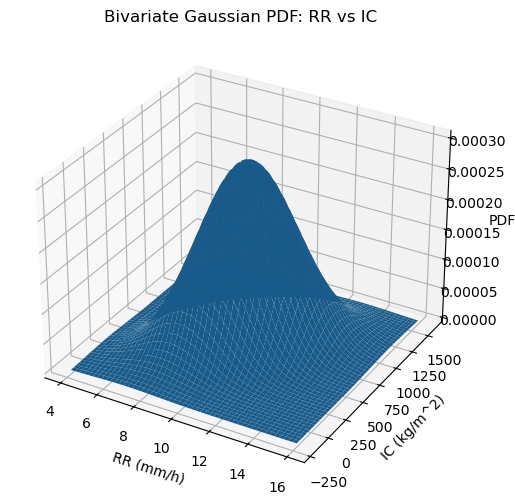

In [8]:
# Define the mesh of values where we want to evaluate the random variables
n = 200 #size of the mesh
values_RR = np.linspace(mu1 - 3*np.sqrt(s1), mu1 + 3*np.sqrt(s1), n)
values_IC = np.linspace(mu2 - 3*np.sqrt(s2), mu2 + 3*np.sqrt(s2), n)

# Define the grid
X1,X2 = np.meshgrid(values_RR, values_IC)
X = np.column_stack([X1.ravel(), X2.ravel()])

# Evaluate the PDF
Z = multivariate_normal(mean=mu, cov=sigma).pdf(X)

# Create the 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X1, X2, Z.reshape(n, n), linewidth=0, antialiased=True)
ax.set_xlabel("RR (mm/h)")
ax.set_ylabel("IC (kg/m^2)")
ax.set_zlabel("PDF")
ax.set_title("Bivariate Gaussian PDF: RR vs IC")
plt.show()

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 3.4:}$

Using the defined bivariate Gaussian distribution, compute and plot the bivariate PDF as contours where densities are projected. This is, the x- and y-axis are the values of $RR$ and $IC$ and the contours in the plot represent values of densities.
</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 90%"> <p>

$\text{Tip:}$

*Hint 1: you can reuse the grid defined in the previous task.*

*Hint 2: use contour of matplotlib to draw the contours.*
</p></div>

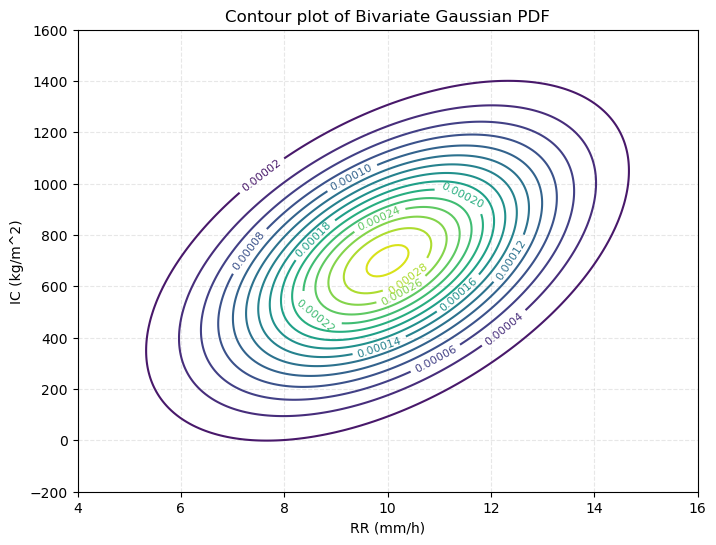

In [9]:
Z_mesh = Z.reshape(n, n)

plt.figure(figsize=(8,6))
contours = plt.contour(X1, X2, Z_mesh, levels=15, cmap="viridis")
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel("RR (mm/h)")
plt.ylabel("IC (kg/m^2)")
plt.title("Contour plot of Bivariate Gaussian PDF")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

> By Tom van Woudenberg and Patricia Mares Nasarre, Delft University of Technology. CC BY 4.0, more info [on the Credits page of Workbook](https://mude.citg.tudelft.nl/workbook-2025/credits.html).